# Linear Algebra in 3D

So far we only looked at linear algebra in the 2-dimensional interpretation. However, when you work with data you will be dealing with likely a lot more dimensions in 3D, 4D, and beyond. We will use this section to get a glimpse into this world and understand multidimensionality a bit more formally. 

##  Vectors in Higher Dimensions

A vector can have more than 2 dimensions. It can have 3, 10, or 10,000 dimensions. Beyond 3 dimensions, it can be difficult to visualize but numerically things stay consistent. 

When we have a higher number of dimensions, we extend our linear space to not just have basis vectors $ \hat{i} $ and $\hat{j} $, but $ \hat{k}$, $ \hat{l}$, and beyond. 

Here is how we visualize the basis vectors in a 3-dimensional space. 

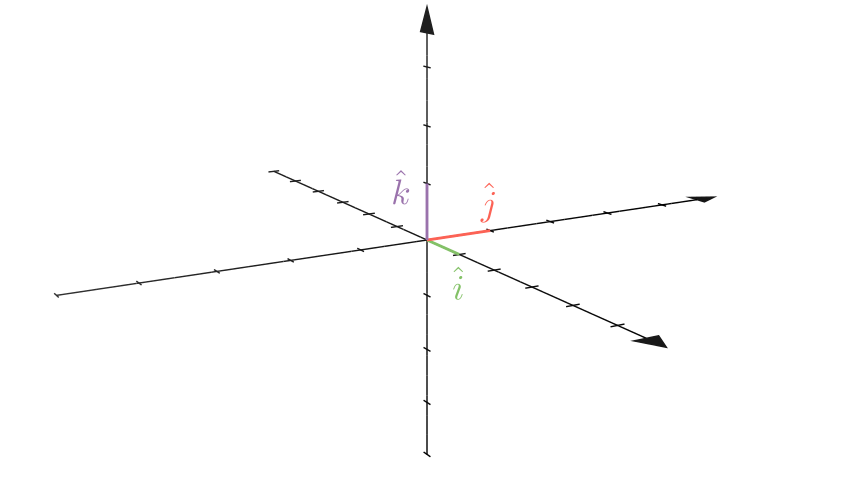


Here is how we define those basis vectors into a matrix. 

img


In [7]:
import numpy as np 

i_hat = np.array([1,0,0])
j_hat = np.array([0,1,0])
k_hat = np.array([0,0,1])

A = np.array([i_hat, j_hat, k_hat]).transpose()
A

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

We can declare a vector $ \vec{v} $ in a 3D space using three elements. 

$
\Large \vec{v} = \Large  \begin{bmatrix} 1 \\ 4 \\ 3 \end{bmatrix}
$

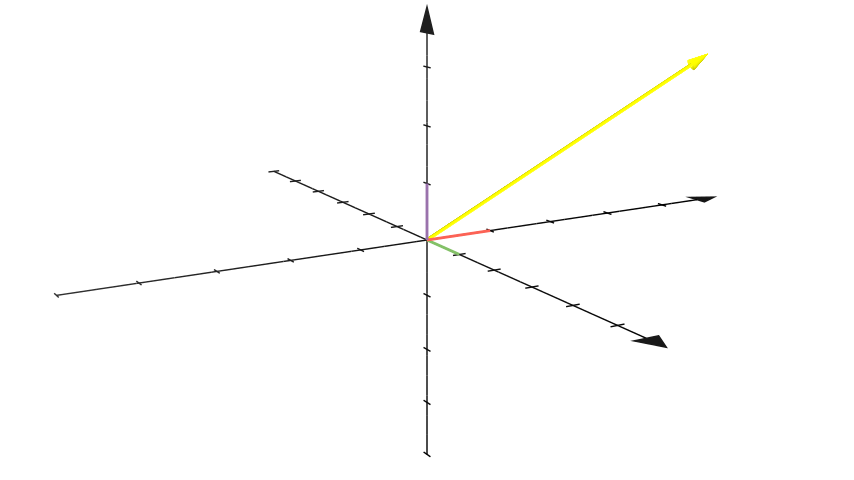


Here is vector $ \vec{v} = \begin{bmatrix} 1 \\ 4 \\ 3 \end{bmatrix} $ walked through each component. 

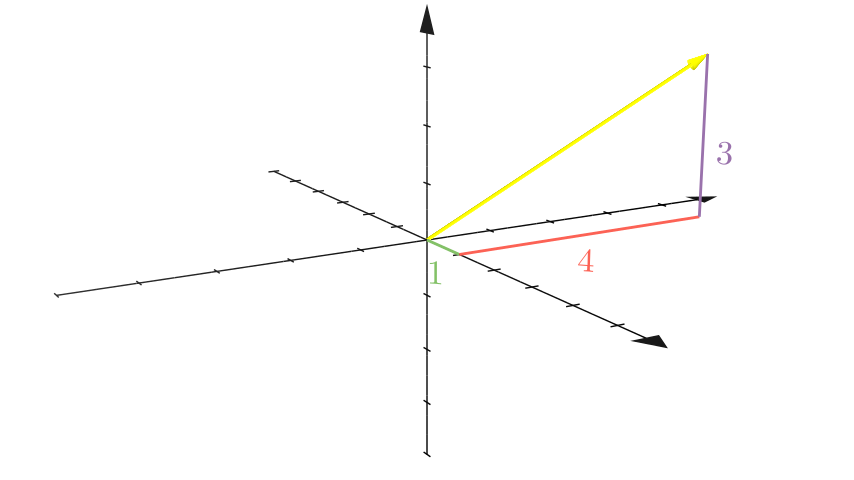


In [12]:
import numpy as np 

v = np.array([1,4,3])
v

array([1, 4, 3])

## Linear Transformations in 3D

Now let's discuss how linear transformations are applied in multidimensional settings. Let's say $ \hat{i} $, $ \hat{j} $, and $ \hat{k} $ land at these locations. 


$
A = \begin{bmatrix}
            1.5 & -1 & 2.5 \\
            0 & -2 & 1 \\
            -2 & 1  & -0.5 
\end{bmatrix}
$

What does this do to vector $ \vec{v} $? 

$
\vec{v} = \begin{bmatrix} 1 \\ 4 \\ 3 \end{bmatrix} 
$

Let's visualize this transformation first in this animation.

<video src="https://github.com/thomasnield/anaconda_linear_algebra/raw/main/media/03_TransformedThreeDVectorScene.mp4" controls="controls" style="max-width: 730px;">
</video>

The operation is still done the same way in Python as we did with 2D spaces, using the `@` operator.  

In [19]:
import numpy as np 
import sympy as sp 

i_hat = np.array([1.5,0,2])
j_hat = np.array([-1,-2,1])
k_hat = np.array([2.5,1,-0.5])

A = np.array([i_hat, j_hat, k_hat]).transpose()
v = np.array([1,4,3])
A @ v

array([ 5. , -5. ,  4.5])

Just as consistent, the numerical operation for matrix-vector multiplication remains the same pattern. Multiply each respective row with each respective column, and sum the elemenets of each together. 

$ 
\begin{bmatrix}1.5 & -1.0 & 2.5\\0 & -2.0 & 1.0\\2.0 & 1.0 & -0.5\end{bmatrix} \begin{bmatrix}1\\4\\3\end{bmatrix} = \begin{bmatrix}(1.5)(1) + (-1.0)(4) + (2.5)(3)\\(0)(1) + (-2.0)(4) + (1.0)(3)\\(2.0)(1) + (1.0)(4) + (-0.5)(4)\end{bmatrix} = \begin{bmatrix}5.0\\-5.0\\4.5\end{bmatrix}
$

## Tensors and Higher Dimensional Data


Tensors are not really much different from the matrices we learned previously. However, matrices are often associated with being 2-dimensional while tensors are often associated as higher dimensional matrices. 

Let's take images for example. A single image has two dimensions at first glance: the number of pixels in a row and the number of pixels in a column. However, a color image is going to have three values for each pixel: the red, green, and blue values. This means there are three values stored in each pixel making this a higher-dimensional tensor. Understanding this is highly critical when you perform deep learning on images and you break up the pixels as inputs into a neural network. 

Below is a visualization of the tensor of a 5x5 pixel image, where each pixel contains the red, green, and blue values. 

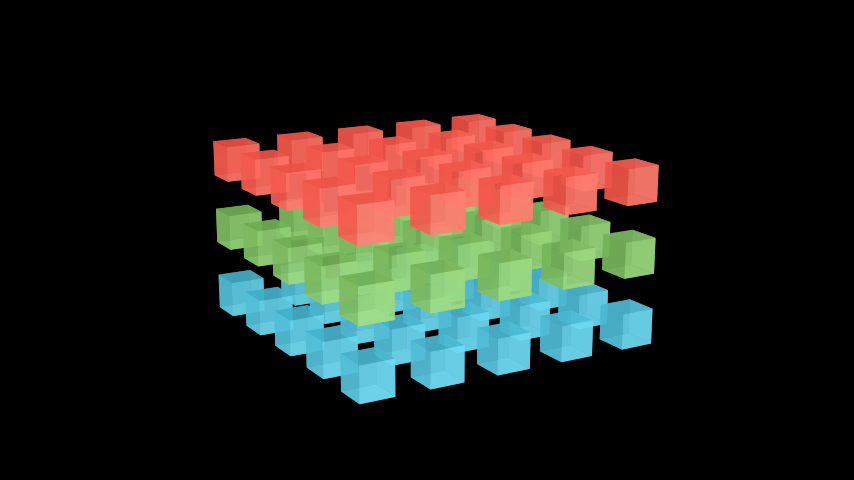


Then consider what a movie is: a series of image frames. This would add yet another dimension where we have each frame managed along that axis! 

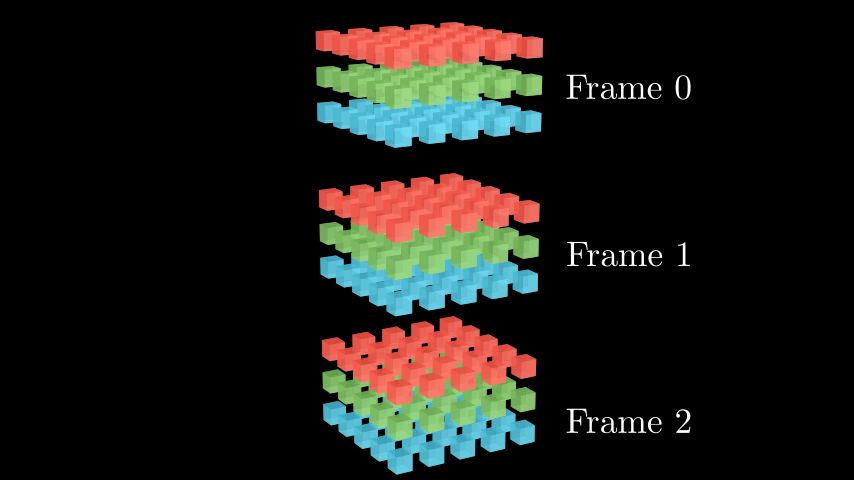

To keep things simple, let's consider just an single image for now. Generate a 200x200 random image of random pixel values (with random red, green, blue values).  

(200, 200, 3)


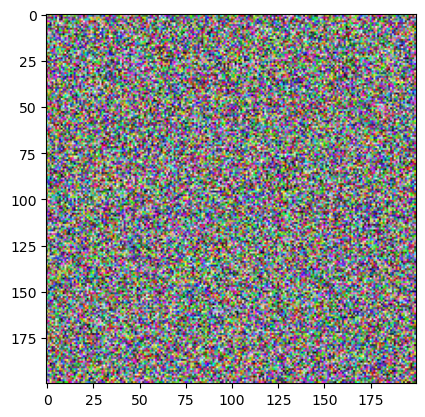

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Create a 3-dimensional array with dimensions 200, 200, 3.
# The third dimension represents the RGB color channels.
image_array = np.random.randint(0, 255, (200, 200, 3))

# Print the shape of the array.
print(image_array.shape)

# Save the array as a PNG image.
plt.imshow(image_array)

Observe the dimensions and shape above, and let's move onto a more applied example taking a real image and turning it into a tensor. Let's load an image of a dog using the `Image.open()` method and then load it into NumPy. 

(706, 1060, 3)


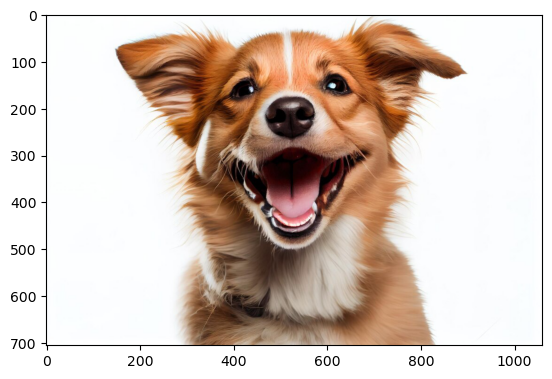

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
# import urllib.request

# Download the image file 
# url = r"https://img.freepik.com/free-photo/isolated-happy-smiling-dog-white-background-portrait-4_1562-693.jpg?w=1800&t=st=1690429756~exp=1690430356~hmac=62b3f269479c67fe46d3fa008d9a999d8c6979b69054b84cfd4304d5b41e41a7"
# urllib.request.urlretrieve(url, "happy_dog.png")

# Load the image file
image = Image.open("../Linear Algebra/smiling_dog.jpg")

# Convert the image to a NumPy array
image_array = np.array(image)
                       
# Print the shape of the array
print(image_array.shape)

# Save the array as a PNG image
plt.imshow(image_array)

Using NumPy, we can extract each of the red, green, and blue channels by extracting each of the layers. Let's grab the green channel which exists at index 1 on the third axis. The red channel would be at index 0, and the blue would be at index 2. 

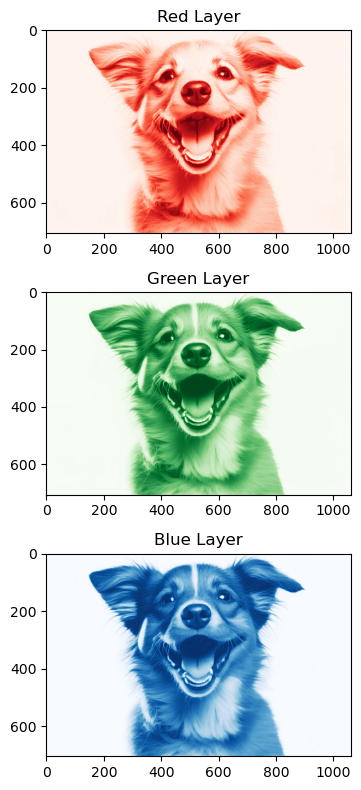

In [86]:
r_layer = image_array[:, :, 0]
g_layer = image_array[:, :, 1]
b_layer = image_array[:, :, 2]

# set up an axis object to facet the plots
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(24, 8))

# set up the image plots
ax[0].imshow(255 - r_layer, cmap='Reds')
ax[1].imshow(255 - g_layer, cmap='Greens')
ax[2].imshow(255 - b_layer, cmap='Blues')

# add titles
ax[0].set_title("Red Layer")
ax[1].set_title("Green Layer")
ax[2].set_title("Blue Layer")

# Adjust layout for better spacing
plt.tight_layout()

plt.show()

In [100]:
# build an independent exercise solution
A = np.array(((2,2,2),(1,-10,-7.5),(-1,5,6.5))).transpose()
v = np.array((1,1,2))

display(A)
display(v)
display(A @ v)

array([[  2. ,   1. ,  -1. ],
       [  2. , -10. ,   5. ],
       [  2. ,  -7.5,   6.5]])

array([1, 1, 2])

array([1. , 2. , 7.5])

## Exercise

Vector $ \vec{v} $ starts at location $ \begin{bmatrix} 1 \\ 1 \\ 2 \end{bmatrix} $. However, a transformation occurs with matrix $ \begin{bmatrix} 2 & 1 & -1 \\ 2 & -10 & 5 \\ 2 & -7.5 & 6.5 \end{bmatrix} $. 

Where does $ \vec{v} $ land? 

Use Python and NumPy to calculate the answer, or calculate by hand on pencil and paper. 

### SCROLL DOWN FOR ANSWER
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
v 

Vector $ \vec{v} $ lands at $ \begin{bmatrix} 1 & 2 & 7.5 \end{bmatrix} $ after applying this matrix. 


$ A\vec{v} = 
\begin{bmatrix}2 & 1 & -1\\2 & -10 & 5\\2 & -7.5 & 6.5\end{bmatrix} \begin{bmatrix}1\\1\\2\end{bmatrix}= \begin{bmatrix}(2)(1) + (1)(1) + (-1)(2)\\(2)(1) + (-10)(1) + (5)(2)\\(2)(1) + (-7.5)(1) + (6.5)(2)\end{bmatrix} = \begin{bmatrix}1\\2\\7.5\end{bmatrix}\
$

In [102]:
import numpy as np 

i_hat = np.array([2,2,2])
j_hat = np.array([1,-10,-7.5])
k_hat = np.array([-1,5,6.5])


A = np.array([i_hat, j_hat, k_hat]).transpose()

v = np.array([1,1,2])
A @ v

array([1. , 2. , 7.5])